# Task 02 
1. Analysis of essential elements of egg signals

# E.G.G waveform
EGG signal is composed of :
a high-frequency component which is relative to vocal folds vibration (voice)
a low-frequency component which is relative to low movement of larynx (ex : swallowing).


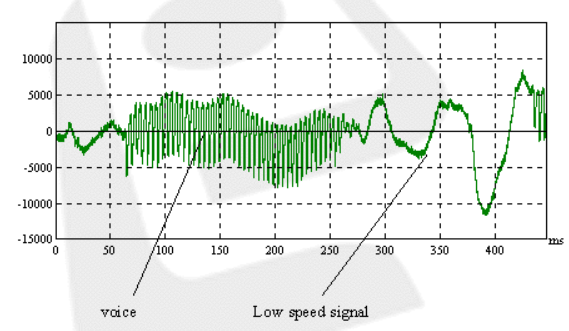

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [10]:
overlap = 1024
frame_length = 2048

In [11]:
from scipy.io import wavfile

def readAudio(audio):
    fs, amp = wavfile.read(audio)
    dt = 1/fs
    n = len(amp)
    t = dt*n

    if t > 1.0:
        amp = amp[int((t/2 - 0.5)/dt):int((t/2 + 0.5)/dt)]
        n = len(amp)
        t = dt*n
    
    return(amp, fs, n, t)

Text(0.5, 1.0, 'signal')

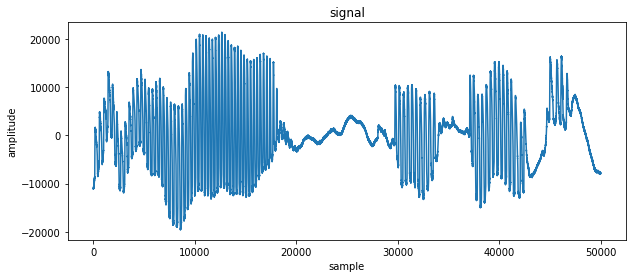

In [13]:
amp, fs, n ,t = readAudio('4-phrase-egg.wav')


fig = plt.figure(figsize=(10,4))

plt.plot(amp)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

## Play and display "Raw EGG signal"

In [14]:
import IPython

IPython.display.Audio("4-phrase-egg.wav")

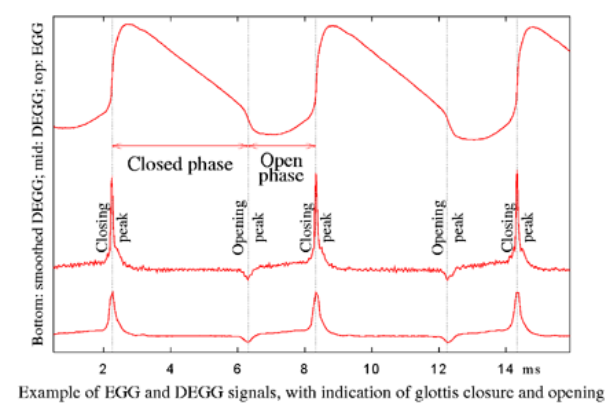

# Extraction of glottal features from audio files
Compute features based on the glottal source reconstruction from sustained vowels Nine descriptors are computed:

Variability of time between consecutive glottal closure instants (GCI)
Average opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration / duration of glottal cycle
Variability of opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration /duration of glottal cycle
Average normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
Variability of normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
Average H1H2: Difference between the first two harmonics of the glottal flow signal
Variability H1H2: Difference between the first two harmonics of the glottal flow signal
Average of Harmonic richness factor (HRF): ratio of the sum of the harmonics amplitude and the amplitude of the fundamental frequency
Variability of HRF
--Static or dynamic matrices can be computed:

--Static matrix is formed with 36 features formed with (9 descriptors) x (4 functionals: mean, std, skewness, kurtosis)

--Dynamic matrix is formed with the 9 descriptors computed for frames of 200 ms length.

In [39]:
#%% Read Audio Data
#[file,path]=uigetfile('.wav');
#[S,Fs]=audioread(file);
Fs=fs
S= amp;

In [51]:
#%% Set constants
cutoff=0.35;

#SAMPLE_RATE = 44100  # Hertz
SAMPLE_RATE = 49999  # Hertz
DURATION = 1  # Seconds

In [53]:
fs

50000

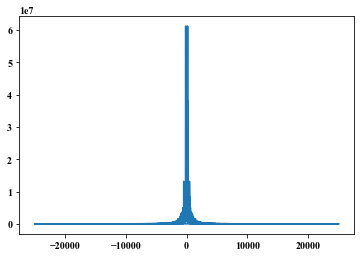

In [110]:
from scipy.fft import fft, fftfreq
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(amp)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [113]:
import librosa
from matplotlib import pyplot as plt

In [115]:
x, sampling_rate = librosa.load("4-phrase-egg.wav", sr=None)
sampling_rate = librosa.get_samplerate("4-phrase-egg.wav")
print('sampling rate: ', sampling_rate)
duration = librosa.get_duration(x)
print('duration: ', duration)

sampling rate:  50000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass y=[-0.08761597 -0.09136963 -0.08804321 ...  0.01016235  0.01391602
  0.0149231 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


duration:  4.211065759637188


# Finding quotients (opening and Closing of EGG signal )

In [77]:
Y = abs((fft(S)));

In [78]:
print(Y)

[ 2532845.          1892199.33332588 12370694.49054823 ...
 20313801.8939378  12370694.49054823  1892199.33332588]


In [82]:
#%% Do Calculations
#%find subsamle size using largest frequency component

Y = [len(Y)/2];
kmax = np.max(Y);
subsamplesize = round(len(Y)/kmax);

In [ ]:
subsamplesize=10
#calculate closed quotient for subsamples of the signal, 
#then find the average for the whole signal
subsamples = np.ceil(len(S)/subsamplesize);
cq = 0; #%running total of closed quotient for each subsample
for i in range(subsamples):
    starti = ((i-1)*subsamplesize)+1;
    endi = i*subsamplesize;
    if(endi <= len(S)):
        s = S[starti:endi];
    else:
        s = S[starti:end];
    
    minval = min(s);
    s = s - minval;
    maxval = max(s);
    closed = length(find(s < (maxval*cutoff)));
    cq = cq + (closed/length(s));

#%calculate average closed quotient for whole signal
CQ = cq/subsamples;

# Pitch Value of EGG corresponding to Voice

In [16]:
import parselmouth

In [21]:
threshold = 80
i=0
MIC_PITCH = []
EGG_PITCH = []

In [22]:
snd = parselmouth.Sound('4-phrase.wav')
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']
MIC_PITCH.append(np.mean(pitch_values[pitch_values>threshold]))

In [23]:
snd = parselmouth.Sound('4-phrase-egg.wav')
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']
EGG_PITCH.append(np.mean(pitch_values[pitch_values>threshold]))

In [24]:
EGG_PITCH

[123.24601649552314]

# SNR Value of EGG corresponding to Voice

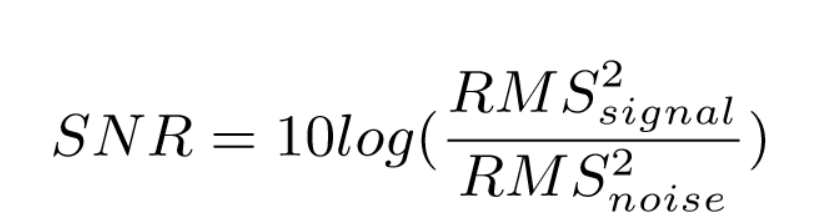

In [147]:
squaredSig = amp**2

In [149]:
Abs= np.abs(squaredSig) # because of egg signal , having negative values

In [152]:

Mn = np.mean(Abs)

In [153]:
import numpy as np
RMS = np.sqrt(Mn)

In [154]:
RMS

127.86686223838127

In [157]:
noise=np.random.normal(0, RMS, amp.shape[0])

In [161]:
import cmath

In [165]:
len(amp)

49999

In [164]:
len(X)

25000

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


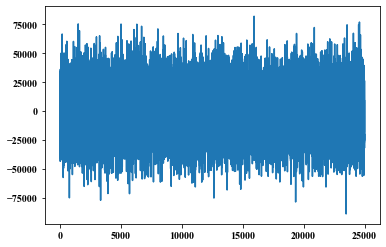

In [167]:
X=np.fft.rfft(noise)

plt.plot(X)
plt.show()

In [168]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [169]:
signaltonoise(amp) ## egg signal snr

array(0.00656784)